In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
from sklearn.linear_model import LinearRegression
import scikit_posthocs

## Database

Import of the scale values of the subjective test results. This scale values represent the perception of the degree of anger. A higher scale value means a higher perception of anger

In [3]:
df = pd.read_csv('scale_value_results.csv')

In [4]:
df.head()

,subject,german1,german2,german3,greek1,greek2,greek3
0,1,-0.626657,0.208886,0.626657,-1.044428,0.000000,0.835543
1,2,-0.208886,0.626657,1.044428,-0.626657,0.000000,-0.835543
2,3,0.208886,0.208886,1.044428,-1.044428,0.208886,-0.626657
3,4,-0.835543,-0.835543,1.044428,0.417771,0.417771,-0.208886
4,5,0.208886,0.208886,1.044428,-1.044428,-0.208886,-0.208886


Re-shape the data

In [5]:
df_melt = pd.melt(df,id_vars=['subject'],value_vars=['german1', 'german2','german3','greek1','greek2','greek3'],value_name='SV')

In [6]:
df_melt['language'] = df_melt.variable.apply(lambda x: 'german' if x[1] == 'e' else 'greek')

In [7]:
german_sv = df_melt[df_melt.language == 'german'].SV
greek_sv = df_melt[df_melt.language == 'greek'].SV

In [8]:
df_melt.head()

,subject,variable,SV,language
0,1,german1,-0.626657,german
1,2,german1,-0.208886,german
2,3,german1,0.208886,german
3,4,german1,-0.835543,german
4,5,german1,0.208886,german


Boxplot of individual scale values

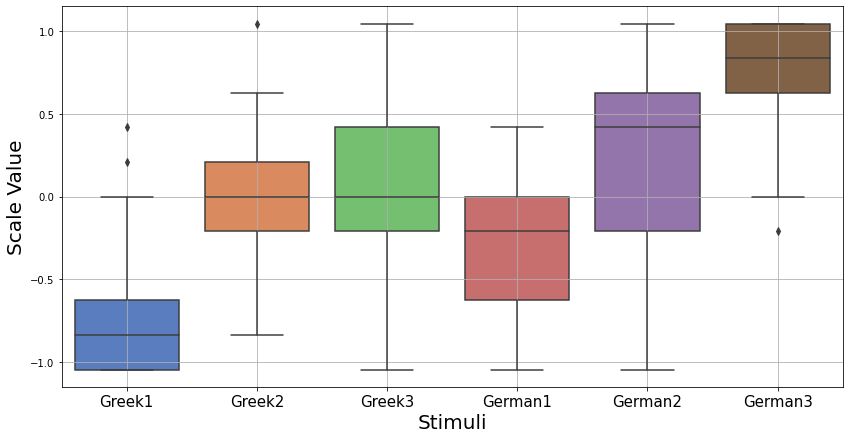

In [10]:
dims = (14, 7)
fig, ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    ax = sns.boxplot(x=df_melt.variable,y=df_melt.SV,data = df_melt, palette = 'muted',ax=ax,order=['greek1','greek2','greek3','german1','german2','german3'])
    ax.set_xlabel('Stimuli',size=20)
    ax.set_ylabel('Scale Value',size=20)
    ax.set_xticklabels(['Greek1','Greek2','Greek3','German1','German2','German3'],size=15)
    plt.grid()
    #ax.set_yticks([-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    #ax.set_yticklabels(['0','100000','200000','300000','400000','500000'],size=15)

### Normality test

In [11]:
stimuli = ['german1','german2','german3','greek1','greek2','greek3']

In [12]:
shapiro_result = []
p_value = []
for i in stimuli:
    s,p = sc.stats.shapiro(df_melt[df_melt.variable == i].SV)
    shapiro_result.append(s)
    p_value.append(p)
shapiro_dict = {'stimuli' :stimuli, 'shapiro_result' : shapiro_result,'p_value': p_value}    

In [13]:
shapiro = pd.DataFrame(shapiro_dict)

In [14]:
shapiro

,stimuli,shapiro_result,p_value
0,german1,0.941252,0.073877
1,german2,0.861780,0.000625
2,german3,0.766995,0.000008
3,greek1,0.827181,0.000111
4,greek2,0.967906,0.424645
5,greek3,0.971392,0.519610


German1, Greek2 and Greek3 normal

Normality by language

In [15]:
df_melt.head()

,subject,variable,SV,language
0,1,german1,-0.626657,german
1,2,german1,-0.208886,german
2,3,german1,0.208886,german
3,4,german1,-0.835543,german
4,5,german1,0.208886,german


In [16]:
shapiro_result_language = []
p_value_language = []
for i in ['greek','german']:
    s,p = sc.stats.shapiro(df_melt[df_melt.language == i].SV)
    shapiro_result_language.append(s)
    p_value_language.append(p)
shapiro_dict_language = {'stimuli' :['greek','german'], 'shapiro_result' : shapiro_result_language,'p_value': p_value_language} 
shapiro_language = pd.DataFrame(shapiro_dict_language)

In [17]:
shapiro_language

,stimuli,shapiro_result,p_value
0,greek,0.947682,0.000629
1,german,0.926368,0.000034


Normality not confirmed

### Homogenity test

In [18]:
l,p = sc.stats.levene(df_melt[df_melt.variable == stimuli[0]].SV,df_melt[df_melt.variable == stimuli[1]].SV,
                     df_melt[df_melt.variable == stimuli[2]].SV,df_melt[df_melt.variable == stimuli[3]].SV,
                     df_melt[df_melt.variable == stimuli[4]].SV,df_melt[df_melt.variable == stimuli[5]].SV,center='median')
print(l)
print(p)    

2.432606198491166
0.036402372890006654


Homogenity of variance not confirmed

## Kruskal Wallis test

Now we need to import the objective parameter which is de variation of fundamental frequency of each audio

In [23]:
std_fo_mel = {'german1': 178.31, 'german2': 233.57,'german3': 284.71,'greek1': 98.9,'greek2': 148.08,'greek3': 177.54}

In [24]:
df_melt['std_fo_mel'] = df_melt.variable.apply(lambda x: std_fo_mel[x])

In [25]:
df_melt.head()

,subject,variable,SV,language,std_fo_mel
0,1,german1,-0.626657,german,178.31
1,2,german1,-0.208886,german,178.31
2,3,german1,0.208886,german,178.31
3,4,german1,-0.835543,german,178.31
4,5,german1,0.208886,german,178.31


In [26]:
kruskal,p = sc.stats.kruskal(df_melt.std_fo_mel,df_melt.SV)
print(kruskal)
print(p)

297.6703531323956
1.0600575691010924e-66


There is significance influence of frequency variation on perception of anger

## Post Hoc - Language

In [29]:
post_hoc = [german_sv.values,greek_sv.values]

In [30]:
scikit_posthocs.posthoc_conover(post_hoc, p_adjust = 'holm')

,1,2
1,1.000000,0.000002
2,0.000002,1.000000


## Correlation

In [31]:
SV_globales = [-0.3551666493,0.1445861402,1.006566461,-0.8373654312,0.05974245641,-0.01836297701]

In [32]:
df_corr_dict = {'stimuli':['german1','geman2','german3','greek1','greek2','greek3'],
               'std_fo_mel': [178.31,233.57,284.71,98.90,148.08,177.54],
               'SV':SV_globales}
df_corr = pd.DataFrame(df_corr_dict)
df_corr

,stimuli,std_fo_mel,SV
0,german1,178.31,-0.355167
1,geman2,233.57,0.144586
2,german3,284.71,1.006566
3,greek1,98.90,-0.837365
4,greek2,148.08,0.059742
5,greek3,177.54,-0.018363


### Pearson and Spearman

In [33]:
r,p = sc.stats.pearsonr(df_corr.std_fo_mel,df_corr.SV)
print(r)
print(p)

0.9050331358219544
0.013099818857462395


Significance correlation

In [34]:
sp,p = sc.stats.spearmanr(df_corr.std_fo_mel,df_corr.SV)
print(r)
print(p)

0.9050331358219544
0.07239650145772594


## REGRESION LINEAL

In [35]:
X = df_corr[['std_fo_mel']]
y = df_corr.SV
reg = LinearRegression().fit(X,y)

In [36]:
print ('Intercepto=', ' ', reg.intercept_)
print ('RM=', ' ', reg.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2', ' ', reg.score(X, y))

Intercepto=   -1.587842596613338
RM=   [0.00849788]
R2   0.8190849769357204


In [44]:
def recta(x):
    y = reg.coef_ * x + reg.intercept_
    return y
x = df_corr.std_fo_mel
y = [recta(x)[0] for x in x]

## Graphs

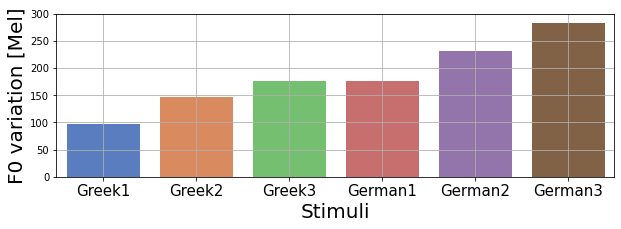

In [45]:
dims = (10, 3)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x=['Greek1','Greek2','Greek3','German1','German2','German3'],y=df_corr.std_fo_mel.sort_values(),palette='muted')
    g.set_xlabel('Stimuli',size=20)
    g.set_ylabel('F0 variation [Mel]',size=20)
    g.set_yticks([0,50,100,150,200,250,300])
    g.set_xticklabels(['Greek1','Greek2','Greek3','German1','German2','German3'],size=15)
    g.grid()

In [46]:
df_corr['SV2'] = df_corr.SV + 2

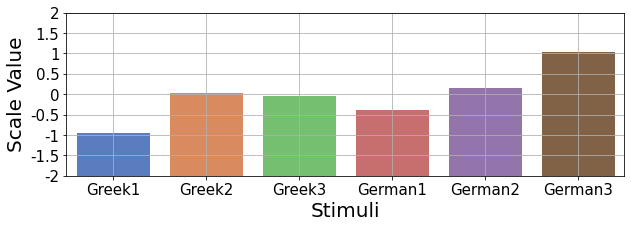

In [47]:
dims = (10, 3)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x=['Greek1','Greek2','Greek3','German1','German2','German3'],y=[1.08,2.06,1.99,1.63,2.18,3.05],palette='muted')
    g.set_xlabel('Stimuli',size=20)
    g.set_ylabel('Scale Value',size=20)
    g.set_yticks([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4])
    g.set_yticklabels(['-2','-1.5','-1','-0.5','0','0.5','1','1.5','2'],size=15)
    g.set_xticklabels(['Greek1','Greek2','Greek3','German1','German2','German3'],size=15)
    g.grid()

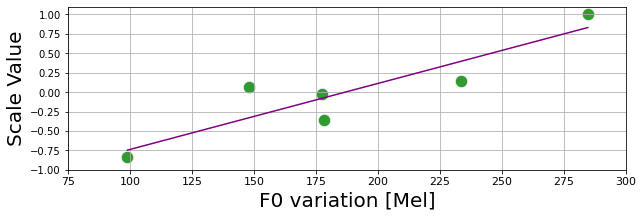

In [48]:
dims = (10, 3)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.scatterplot(data=df_corr,y='SV',x='std_fo_mel',alpha = .8,s = 150,color='green')
    g = sns.lineplot(x = x,y= y,color='purple')
    g.set_xlabel('F0 variation [Mel]',size=20)
    g.set_ylabel('Scale Value',size=20)
    g.set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
    g.set_xticks([75,100,125,150,175,200,225,250,275,300])
    g.set_xticklabels([75,100,125,150,175,200,225,250,275,300],size=11)
    g.grid()

In [49]:
combinaciones = ['German1-German2','German1-German3','German1-Greek1','German1-Greek2','German1-Greek3',
                'German2-German3','German2-Greek1','German2-Greek2','German2-Greek3','German3-Greek1',
                'German3-Greek2','German3-Greek3','Greek1-Greek2','Greek2-Greek3','Greek1-Greek3']*3

Choice = ['Voice 1']*15 + ['Voice 2']*15 + ['Tie']*15

cantidad = [6,4,24,5,9,2,28,16,19,33,30,31,1,16,4,22,31,4,21,22,26,6,9,15,2,5,5,28,15,26,9,2,9,11,6,9,3,12,3,2,2,1,8,6,7]

In [50]:
resultados_dict = {'combinaciones':combinaciones,'Choice':Choice,'cantidad':cantidad}

In [51]:
resultados_df = pd.DataFrame(resultados_dict)

In [52]:
resultados_df['cantidad'] = (resultados_df.cantidad / 37)*100

In [53]:
resultados_df.head()

,combinaciones,Choice,cantidad
0,German1-German2,Voice 1,16.216216
1,German1-German3,Voice 1,10.810811
2,German1-Greek1,Voice 1,64.864865
3,German1-Greek2,Voice 1,13.513514
4,German1-Greek3,Voice 1,24.324324


In [121]:
labels = ['German1-German2','German1-German3','German1-Greek1','German1-Greek2','German1-Greek3',
                'German2-German3','German2-Greek1','German2-Greek2','German2-Greek3','German3-Greek1',
                'German3-Greek2','German3-Greek3','Greek1-Greek2','Greek2-Greek3','Greek1-Greek3']

In [122]:
colors = sns.color_palette()

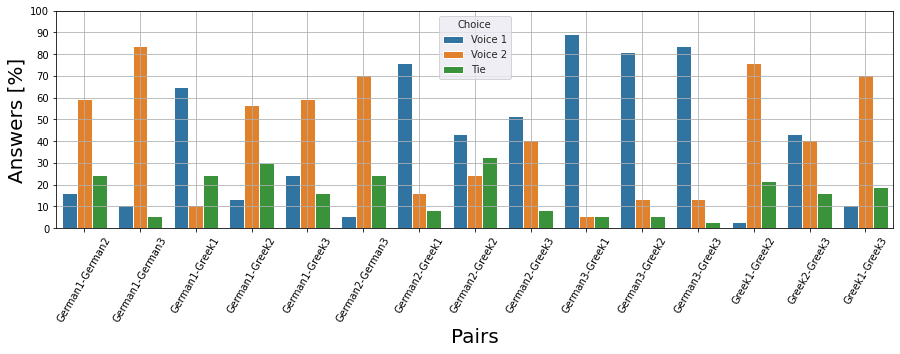

In [123]:
dims = (15, 4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x=resultados_df.combinaciones,y=resultados_df.cantidad,hue=resultados_df.Choice)
    g.set_xlabel('Pairs',size=20)
    g.set_ylabel('Answers [%]',size=20)
    g.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
    g.grid()
    #g.set_yticklabels(['-1.5','-1','-0.5','0','0.5','1'],size=15)
    g.set_xticklabels(labels,size=10,rotation=60)
    #g.grid()